In [15]:
# import biblioteka
import pandas as pd
import numpy as np
import data_load as dl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# uvoz dataseta
df = dl.load_data(13)

c:\Users\Dell\Desktop\PAMU domaci 2\data_load.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'type_x', 'locale', 'locale_name', 'description', 'transferred',
       'dcoilwtico', 'family', 'class', 'perishable', 'transactions', 'city',
       'state', 'type_y', 'cluster'],
      dtype='object')


In [3]:
# radi ustede prostora kolona store_nbr ce se pretvoriti u int8, zato sto je najveca vrednost store_nbr oko 55 (mi smo izabrali 13)
df['store_nbr'] = df['store_nbr'].astype('int8')

In [8]:
df.shape

(1770214, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770214 entries, 0 to 1770213
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int8   
 3   item_nbr      int64  
 4   unit_sales    float64
 5   onpromotion   object 
 6   type_x        object 
 7   locale        object 
 8   locale_name   object 
 9   description   object 
 10  transferred   object 
 11  dcoilwtico    float64
 12  family        object 
 13  class         int64  
 14  perishable    int64  
 15  transactions  float64
 16  city          object 
 17  state         object 
 18  type_y        object 
 19  cluster       int64  
dtypes: float64(3), int64(5), int8(1), object(11)
memory usage: 271.8+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={
    'type_x': 'type_holiday'
}, inplace=True)


In [ ]:
# obrada kolona redom
# kolona date ima raspon od malo vise od 4 i po godine
# ne prodaju se svaki dan isti item-i, ima dana kad se proda 4200 itema i ima dana kad se proda manje od 600 itema (razlicitih itema)
# 4 i po godine je 1640 dana otprilike

print(df['date'].max())
print(df['date'].min())
print(df['date'].head(10))
print(df['date'].value_counts())

2017-08-15 00:00:00
2013-01-02 00:00:00
0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
4   2013-01-02
5   2013-01-02
6   2013-01-02
7   2013-01-02
8   2013-01-02
9   2013-01-02
Name: date, dtype: datetime64[ns]
2016-06-25    4209
2017-06-25    4044
2015-06-25    3015
2014-06-25    2976
2017-07-03    2942
              ... 
2013-02-10     592
2013-01-16     586
2013-01-17     577
2013-01-30     568
2013-01-25     563
Name: date, Length: 1679, dtype: int64


In [ ]:
df['item_nbr'].value_counts().describe()
# 25% itema se pojavljuje 212 puta ili manje, tek polovina proizvoda se pojavljuje u 630 dana
# razmotriti da se uzmu samo proizvodi koji se cesto pojavljuju, odnosno za koje mozemo da nadjemo istorijske podatke
# proizvodi koji se malo puta pojavljuju mogu biti novi proizvodi ili specijalni proizvodi koji se ne prodaju cesto
# pogledati da li cemo da uzmemo npr top 20 proizvoda da predvidjamo

# 1 100
# 2 50 
# 3 45


# 50 1
# baseline da se napravi tako kad se uvek stavi za proizvode koji su iznad proseka da ce uvek da se porucuju, a koji su ispod proseka da se ne porucuju
# moze baseline da bude i isto kao prethodne nedelje

count    2554.000000
mean      693.114330
std       517.475591
min         1.000000
25%       212.000000
50%       631.000000
75%      1112.750000
max      1709.000000
Name: item_nbr, dtype: float64

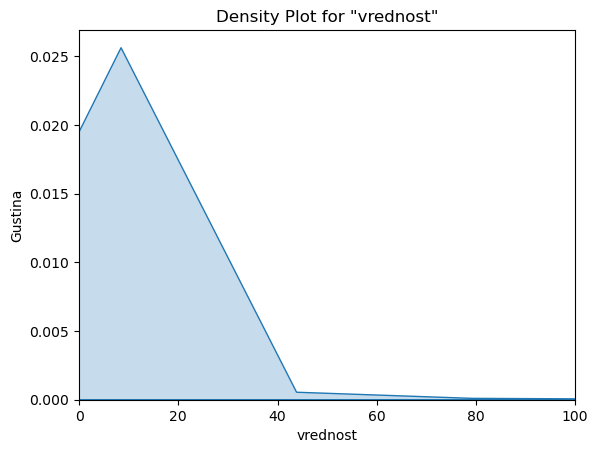

In [ ]:
# Density plot
sns.kdeplot(df['unit_sales'], fill=True)
plt.title('Density Plot for "vrednost"')
plt.xlabel('vrednost')
plt.ylabel('Gustina')
plt.xlim(0,100)
plt.show()
# prodato je najvise izmedju 0 i 30-ak proizvoda, mozda necemo da posmatramo situacije kada je prodato vise proizvoda po danu od toga
# potrebno je odraditi vizuelizaciju ovoga nakon sto se izaberu proizvodi koje zelimo da prodajemo


In [22]:
df['onpromotion'].value_counts()
# postoje samo True i False vrednosti koje su tipa object (string), pa je potrebno da ih promenimo u boolean
df['onpromotion'].replace({
    'False': False,
    'True': True
}, inplace=True)

In [23]:
df['type_holiday'].value_counts()

Holiday       173844
Event          63855
Additional     43265
Transfer       10997
Work Day        4947
Bridge          3570
Name: type_holiday, dtype: int64

In [ ]:
df['locale'].value_counts()
# missing values popunjavamo sa local, najmanje poznato i najveca verovatnoca bi bila da neko ne zna za lokalni praznik (zakljuceno logicki)

National    157518
Local       123111
Regional     19849
Name: locale, dtype: int64

In [ ]:
df['locale_name'].value_counts()
# poklapa se National i Ecuador, sto znaci da nam jedno od ta dva nije potrebno
# potrebno je istraziti gde je ova prodavnica 13 i onda uzeti samo taj locale_name, napraviti boolean varijablu da li je taj locale za praznik ili ne i to ubaciti u model

Ecuador                           157518
Guayaquil                          12030
Riobamba                           10082
Latacunga                           9319
Quito                               9272
Guaranda                            9059
Ambato                              8004
Cuenca                              6263
El Carmen                           5671
Santo Domingo                       5671
Cotopaxi                            5650
Esmeraldas                          5440
Cayambe                             5356
Manta                               5317
Machala                             5195
Imbabura                            5195
Puyo                                4810
Libertad                            4753
Santa Elena                         4554
Salinas                             4487
Santo Domingo de los Tsachilas      4450
Loja                                4248
Ibarra                              4073
Quevedo                             4061
Name: locale_nam

In [ ]:
print(df['description'].value_counts())
# ima previse vrednosti, mozda bude bilo korisno kada se redukuje dataset
# ukupno ima 100 razlicitih opisa

Carnaval                                      10230
Fundacion de Cuenca                            6263
Dia de la Madre-1                              5677
Fundacion de Santo Domingo                     5671
Cantonizacion de El Carmen                     5671
                                              ...  
Mundial de futbol Brasil: Ecuador-Francia       744
Inauguracion Mundial de futbol Brasil           740
Mundial de futbol Brasil: Ecuador-Honduras      703
Recupero puente primer dia del ano              686
Recupero puente Navidad                         678
Name: description, Length: 100, dtype: int64
(100,)


In [ ]:
df['transferred'].value_counts()
# boolean varijabla, oznacava da li je praznik koji se pada na taj dan pomeren za neki drugi dan

False    291588
True       8890
Name: transferred, dtype: int64

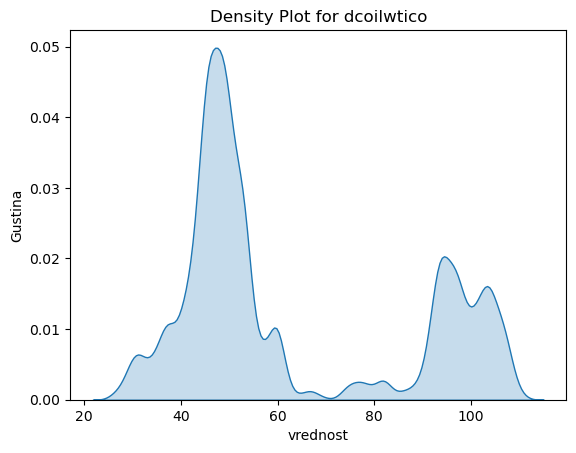

In [ ]:
# Density plot
sns.kdeplot(df['dcoilwtico'], fill=True)
plt.title('Density Plot for dcoilwtico')
plt.xlabel('vrednost')
plt.ylabel('Gustina')
#plt.xlim(0,100)
plt.show()
# bimodalna raspodela, ima 2 brezuljka
# ovo je kolona sa cenom nafte
# ekonomija Ekvadora zavisi od nafte, mozda je dobro da se ne menjaju vrednosti nekim transformacijama zato sto Ekvarodu odgovara visoka cena nafte, to oznacva da je dobar period trenutno, 
# odnosno moze oznacavati ekonomsko blagostanje i samim tim veci zivotni standard ljudi i samim tim vecu potrosnju

In [33]:
df['family'].value_counts()
# vrsta/kategorija/podkategorija proizvoda, na osnovu ovoga mozemo da redukujemo dataset, potrebna je vizuelizacija da bismo videli koje kategorije se najvise prodaju i koje su najzastupljenije
# vizuelizacija ili groupby

GROCERY I                     731541
CLEANING                      276766
BEVERAGES                     268100
DAIRY                         103320
PERSONAL CARE                  64706
DELI                           62290
HOME CARE                      47276
BREAD/BAKERY                   44075
PRODUCE                        39555
MEATS                          23905
POULTRY                        20056
EGGS                           15046
FROZEN FOODS                   14390
LIQUOR,WINE,BEER               12644
PREPARED FOODS                  8246
HOME AND KITCHEN II             6815
HOME AND KITCHEN I              6198
AUTOMOTIVE                      6024
CELEBRATION                     3746
LINGERIE                        2796
LADIESWEAR                      2787
PLAYERS AND ELECTRONICS         2710
GROCERY II                      2397
BEAUTY                          1483
SEAFOOD                         1232
HARDWARE                         622
MAGAZINES                        592
P

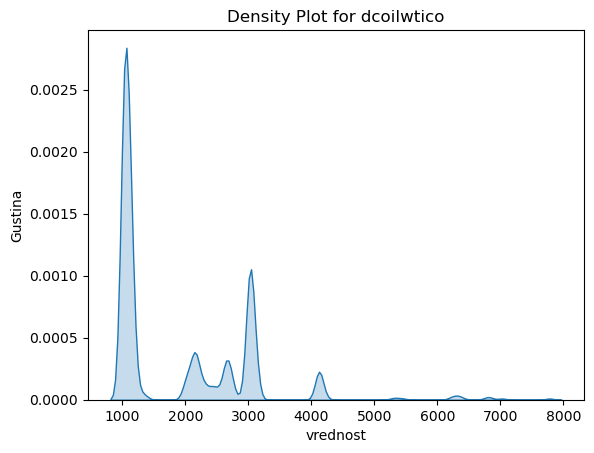

In [ ]:
# Density plot
sns.kdeplot(df['class'], fill=True)
plt.title('Density Plot for class')
plt.xlabel('vrednost')
plt.ylabel('Gustina')
#plt.xlim(0,100)
plt.show()
# ne razumemo varijablu, moramo da pitamo sta ova varijabla znaci, ako ne znamo mozda je bolje da je izbacimo
# ovo je neka vrsta grupe proizvoda, da li su na primer pahuljice ili hleb

In [ ]:
df['class'].value_counts()
# grupa proizvoda, kao familija jednog proizvoda, da li su pahuljice, cips, itd
# razmotriti da li da radimo sa tim kao sa idjem

1040    80112
1016    67039
1034    57984
1122    55989
3020    46991
        ...  
6920        9
2108        8
6258        6
6426        2
2022        1
Name: class, Length: 261, dtype: int64

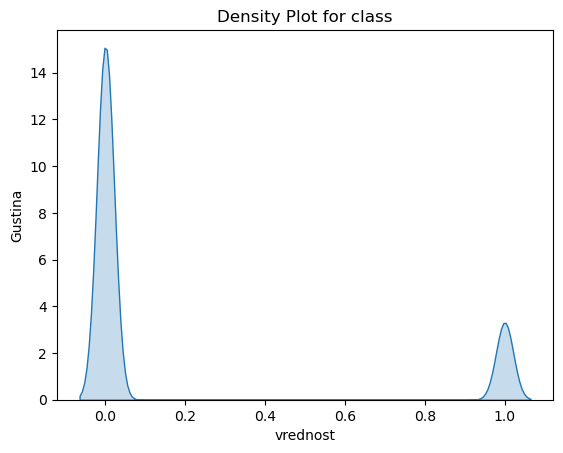

In [ ]:
# Density plot
sns.kdeplot(df['perishable'], fill=True)
plt.title('Density Plot for class')
plt.xlabel('vrednost')
plt.ylabel('Gustina')
#plt.xlim(0,100)
plt.show()
# varijabla za kvarljiv proizvod

In [39]:
#df['perishable'].value_counts()
# ima vrednosti samo 0 i 1, mozda je bolje pretvoriti je u boolean zbog velicine
df['perishable'] = df['perishable'].astype(bool)
df['perishable'].value_counts()

False    1452489
True      317725
Name: perishable, dtype: int64

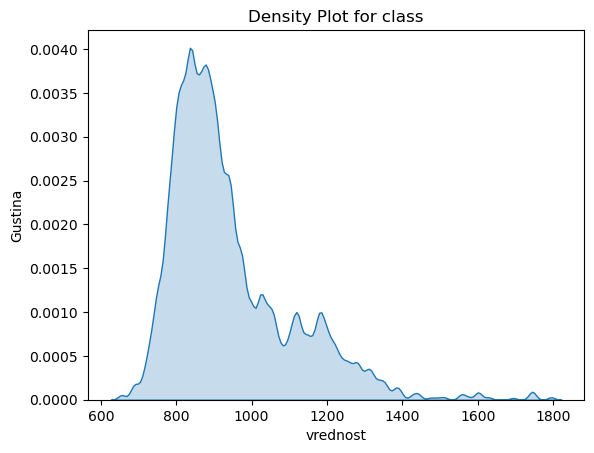

In [ ]:
  # Density plot
sns.kdeplot(df['transactions'], fill=True)
plt.title('Density Plot for class')
plt.xlabel('vrednost')
plt.ylabel('Gustina')
#plt.xlim(0,100)
plt.show()
# broj transakcija, ovo treba srediti log transformacijom

In [ ]:
df['city'].value_counts()
# postoji samo 1 grad jer postoji samo 1 prodavnica, mozemo da povezemo lokalne praznike, jedino za to moze da sluzi mozda

Latacunga    1770214
Name: city, dtype: int64

In [ ]:
df['state'].value_counts()
# isto kao i grad

Cotopaxi    1770214
Name: state, dtype: int64